In [9]:
# add this line in Jupyter to enhance interactivity
%matplotlib inline   
    
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [10]:
#Reading raw data from csv
poverty_data=pd.read_csv('poverty.csv', sep='\t',header=0)
poverty_data

,Index,Inhabitants,%incomes<5k,%unemployed,MurdersPerMil
0,1,587000,16.5,6.2,11.2
1,2,643000,20.5,6.4,13.4
2,3,635000,26.3,9.3,40.7
3,4,692000,16.5,5.3,5.3
4,5,1248000,19.2,7.3,24.8
5,6,643000,16.5,5.9,12.7
6,7,1964000,20.2,6.4,20.9
7,8,1531000,21.3,7.6,35.7
8,9,713000,17.2,4.9,8.7
9,10,749000,14.3,6.4,9.6


In [3]:
poverty_data.describe()

,Index,Inhabitants,%incomes<5k,%unemployed,MurdersPerMil
count,20.00000,2.000000e+01,20.000000,20.000000,20.000000
mean,10.50000,1.433000e+06,19.720000,6.935000,20.570000
std,5.91608,1.703726e+06,3.242254,1.207117,9.881407
min,1.00000,5.870000e+05,14.300000,4.900000,5.300000
25%,5.75000,6.430000e+05,17.125000,6.150000,13.225000
50%,10.50000,7.450000e+05,19.150000,6.600000,19.500000
75%,15.25000,1.318750e+06,21.575000,7.775000,26.075000
max,20.00000,7.895000e+06,26.300000,9.300000,40.700000


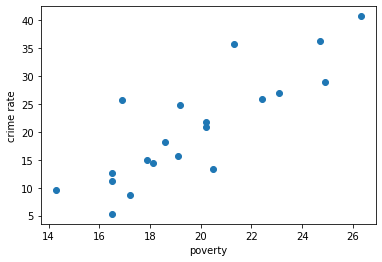

In [11]:
#Specify independent variable (x=poverty) and dependent variables (y=crime rate) from data
x=poverty_data[['%incomes<5k']].to_numpy()
y=poverty_data[['MurdersPerMil']].to_numpy()

#plot the raw data x=poverty(%income<5k), y=crime rate(MurdersPerMil)
plt.figure()
ax = plt.axes()
ax.set_xlabel('poverty')
ax.set_ylabel('crime rate')
ax.scatter(x, y)

In [12]:
#Create and fit a linear regression model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [12]:
#check results
model.intercept_
model.coef_

array([[2.55938958]])

In [13]:
#check R-squared
model.score(x, y)

0.7052275058037657

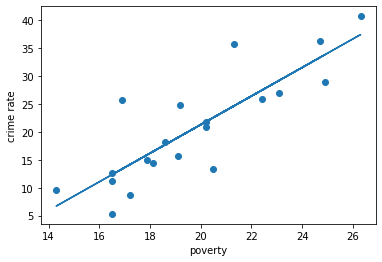

In [14]:
#Use the fitted model to predict estimated crime rate on original poverty (x)
y_est = model.predict(x)

#Plot the estimated line along with scattered raw data on figure
ax=plt.axes()
ax.set_xlabel('poverty')
ax.set_ylabel('crime rate')
ax.scatter(x, y)
ax.plot(x,y_est)

In [15]:
#Use the fitted model to predict a single new data point
x_new = np.asarray([20])
y_pred=model.predict(x_new.reshape(1,-1)) # reshape to (1,-1) for a single data point
print("Estimated Murder Rate for the new data:", y_pred)
y_pred

Estimated Murder Rate for the new data: [[21.28662908]]


array([[21.28662908]])

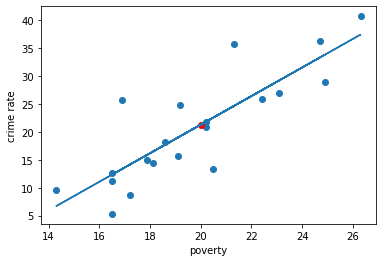

In [16]:
#Plot the predcted result on figure
ax=plt.axes()
ax.set_xlabel('poverty')
ax.set_ylabel('crime rate')
ax.scatter(x, y)
ax.plot(x,y_est)
ax.scatter(x_new,y_pred,color='red')

In [18]:
#Specify independent variables (x) and dependent variables (y) from data
x=poverty_data[['Inhabitants','%incomes<5k','%unemployed']].to_numpy()
y=poverty_data[['MurdersPerMil']].to_numpy()

In [19]:
#Create and fit a linear regression model
model = LinearRegression()
model.fit(x, y)
print("Coefficients:", model.coef_)
print("R-square:", model.score(x, y))

Coefficients: [[7.62936937e-07 1.19217421e+00 4.71982137e+00]]
R-square: 0.818317865815338


In [20]:
#Use the fitted model to predict new data points
new_data1=[595000,20.2,8.4]
new_data2=[596000,10.6,8.1]
X_new=np.asarray([new_data1,new_data2])
y_pred=model.predict(X_new)
print("Estimated Murder Rate for the new data points:", y_pred)

Estimated Murder Rate for the new data points: [[27.41744078]
 [14.55738488]]


In [26]:
import statsmodels.api as sm

#Data were loaded before
X=poverty_data[['%incomes<5k']].to_numpy()
Y=poverty_data[['MurdersPerMil']].to_numpy()
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     43.06
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           3.64e-06
Time:                        13:29:29   Log-Likelihood:                -61.463
No. Observations:                  20   AIC:                             126.9
Df Residuals:                      18   BIC:                             128.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.9012      7.789     -3.839      0.0

In [25]:
import statsmodels.api as sm
X=poverty_data[['Inhabitants','%incomes<5k','%unemployed']].to_numpy()
Y=poverty_data[['MurdersPerMil']].to_numpy()
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     24.02
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           3.63e-06
Time:                        13:22:13   Log-Likelihood:                -56.624
No. Observations:                  20   AIC:                             121.2
Df Residuals:                      16   BIC:                             125.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.7649      7.011     -5.244      0.0